In [1]:
#For model
import keras.backend as K
import keras
from keras.callbacks import TensorBoard
from keras.applications.resnet50 import ResNet50
from keras.models import Model, Sequential
from keras.layers import (Conv2D, Activation, MaxPool2D, Dense, Flatten, GlobalAveragePooling2D, Average,
                          AveragePooling2D, RepeatVector, Reshape, Input, Dropout, Concatenate, TimeDistributed,
                            )
from keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.backend import learning_phase, function


from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
from sklearn.datasets.samples_generator import make_regression, make_friedman1

#For train
import sys
sys.path.insert(0, "/workspace/dataset/2016-ITS-BrnoCompSpeed/code/")
from dataset_info import *
from utils import * 
from loading import * 

from os import listdir
from os.path import isfile, join
import h5py
import scipy
import pandas as pd
from IPython.display import clear_output
%pylab inline

ImportError: No module named keras.backend

In [239]:
dataset = np.array([[x, x**2] for x in np.arange(-2, 7, 0.001)])

In [240]:
X_train, y_train = dataset[:100,0].reshape(-1, 1), dataset[:100,1].reshape(-1, 1)
X, y = dataset[:,0], dataset[:,1]

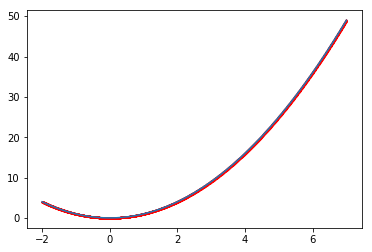

In [241]:
plt.scatter(X, y, s=0.5, label='Neural Net Prediction', color="red")
plt.plot(dataset[:,0], dataset[:,1])

In [242]:
def baseline_model():
    
    inputs = Input(shape=(1,))
    x = Dense(20, activation='relu', kernel_initializer='normal')(inputs)
    x = Dropout(0.05)(x)
    x = Dense(20, activation='relu', kernel_initializer='normal')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(1, activation='linear')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [155]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=10, batch_size=5, verbose=0)

In [161]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=1, verbose=1)))
pipeline = Pipeline(estimators)

In [243]:
#scaler_x = StandardScaler()
#scaler_y = StandardScaler()
#X_train_s = scaler_x.fit_transform(X_train)
#y_train_s = scaler_y.fit_transform(y_train)
model = baseline_model()
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(pipeline, X, y, cv=kfold)
#print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [244]:
model.fit(X_train, y_train, epochs=2000, batch_size=10)

Epoch 1/2000
100/100 [==============================] - 1s 7ms/step - loss: 14.5026
Epoch 2/2000
100/100 [==============================] - 0s 461us/step - loss: 13.9587
Epoch 3/2000
100/100 [==============================] - 0s 428us/step - loss: 13.5025
Epoch 4/2000
100/100 [==============================] - 0s 403us/step - loss: 12.8577
Epoch 5/2000
100/100 [==============================] - 0s 408us/step - loss: 12.0326
Epoch 6/2000
100/100 [==============================] - 0s 392us/step - loss: 10.9807
Epoch 7/2000
100/100 [==============================] - 0s 395us/step - loss: 9.5930
Epoch 8/2000
100/100 [==============================] - 0s 381us/step - loss: 7.8515
Epoch 9/2000
100/100 [==============================] - 0s 400us/step - loss: 5.7944
Epoch 10/2000
100/100 [==============================] - 0s 454us/step - loss: 3.9332
Epoch 11/2000
100/100 [==============================] - 0s 412us/step - loss: 2.2724
Epoch 12/2000
100/100 [==============================] - 0s

100/100 [==============================] - 0s 476us/step - loss: 0.1340
Epoch 191/2000
100/100 [==============================] - 0s 470us/step - loss: 0.1385
Epoch 192/2000
100/100 [==============================] - 0s 473us/step - loss: 0.1533
Epoch 193/2000
100/100 [==============================] - 0s 471us/step - loss: 0.1404
Epoch 194/2000
100/100 [==============================] - 0s 472us/step - loss: 0.1639
Epoch 195/2000
100/100 [==============================] - 0s 503us/step - loss: 0.0893
Epoch 196/2000
100/100 [==============================] - 0s 479us/step - loss: 0.1662
Epoch 197/2000
100/100 [==============================] - 0s 451us/step - loss: 0.1912
Epoch 198/2000
100/100 [==============================] - 0s 460us/step - loss: 0.1777
Epoch 199/2000
100/100 [==============================] - 0s 445us/step - loss: 0.1486
Epoch 200/2000
100/100 [==============================] - 0s 443us/step - loss: 0.1025
Epoch 201/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 488us/step - loss: 0.1030
Epoch 379/2000
100/100 [==============================] - 0s 525us/step - loss: 0.0898
Epoch 380/2000
100/100 [==============================] - 0s 517us/step - loss: 0.0749
Epoch 381/2000
100/100 [==============================] - 0s 499us/step - loss: 0.0999
Epoch 382/2000
100/100 [==============================] - 0s 502us/step - loss: 0.1157
Epoch 383/2000
100/100 [==============================] - 0s 471us/step - loss: 0.1112
Epoch 384/2000
100/100 [==============================] - 0s 438us/step - loss: 0.1105
Epoch 385/2000
100/100 [==============================] - 0s 440us/step - loss: 0.0963
Epoch 386/2000
100/100 [==============================] - 0s 437us/step - loss: 0.1169
Epoch 387/2000
100/100 [==============================] - 0s 463us/step - loss: 0.1274
Epoch 388/2000
100/100 [==============================] - 0s 472us/step - loss: 0.1157
Epoch 389/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 482us/step - loss: 0.0765
Epoch 567/2000
100/100 [==============================] - 0s 517us/step - loss: 0.1011
Epoch 568/2000
100/100 [==============================] - 0s 545us/step - loss: 0.0741
Epoch 569/2000
100/100 [==============================] - 0s 479us/step - loss: 0.0767
Epoch 570/2000
100/100 [==============================] - 0s 476us/step - loss: 0.0965
Epoch 571/2000
100/100 [==============================] - 0s 481us/step - loss: 0.0776
Epoch 572/2000
100/100 [==============================] - 0s 480us/step - loss: 0.0789
Epoch 573/2000
100/100 [==============================] - 0s 470us/step - loss: 0.0843
Epoch 574/2000
100/100 [==============================] - 0s 461us/step - loss: 0.1032
Epoch 575/2000
100/100 [==============================] - 0s 473us/step - loss: 0.0724
Epoch 576/2000
100/100 [==============================] - 0s 465us/step - loss: 0.0879
Epoch 577/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 455us/step - loss: 0.0614
Epoch 755/2000
100/100 [==============================] - 0s 452us/step - loss: 0.0515
Epoch 756/2000
100/100 [==============================] - 0s 434us/step - loss: 0.0948
Epoch 757/2000
100/100 [==============================] - 0s 411us/step - loss: 0.0616
Epoch 758/2000
100/100 [==============================] - 0s 422us/step - loss: 0.0592
Epoch 759/2000
100/100 [==============================] - 0s 382us/step - loss: 0.0628
Epoch 760/2000
100/100 [==============================] - 0s 382us/step - loss: 0.0743
Epoch 761/2000
100/100 [==============================] - 0s 422us/step - loss: 0.0808
Epoch 762/2000
100/100 [==============================] - 0s 446us/step - loss: 0.0559
Epoch 763/2000
100/100 [==============================] - 0s 405us/step - loss: 0.0551
Epoch 764/2000
100/100 [==============================] - 0s 407us/step - loss: 0.0720
Epoch 765/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 428us/step - loss: 0.0477
Epoch 943/2000
100/100 [==============================] - 0s 463us/step - loss: 0.0424
Epoch 944/2000
100/100 [==============================] - 0s 397us/step - loss: 0.0605
Epoch 945/2000
100/100 [==============================] - 0s 360us/step - loss: 0.0453
Epoch 946/2000
100/100 [==============================] - 0s 364us/step - loss: 0.0383
Epoch 947/2000
100/100 [==============================] - 0s 394us/step - loss: 0.0461
Epoch 948/2000
100/100 [==============================] - 0s 384us/step - loss: 0.0528
Epoch 949/2000
100/100 [==============================] - 0s 439us/step - loss: 0.0461
Epoch 950/2000
100/100 [==============================] - 0s 437us/step - loss: 0.0544
Epoch 951/2000
100/100 [==============================] - 0s 422us/step - loss: 0.0403
Epoch 952/2000
100/100 [==============================] - 0s 436us/step - loss: 0.0445
Epoch 953/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 390us/step - loss: 0.0299
Epoch 1129/2000
100/100 [==============================] - 0s 402us/step - loss: 0.0307
Epoch 1130/2000
100/100 [==============================] - 0s 458us/step - loss: 0.0268
Epoch 1131/2000
100/100 [==============================] - 0s 468us/step - loss: 0.0362
Epoch 1132/2000
100/100 [==============================] - 0s 473us/step - loss: 0.0373
Epoch 1133/2000
100/100 [==============================] - 0s 440us/step - loss: 0.0418
Epoch 1134/2000
100/100 [==============================] - 0s 457us/step - loss: 0.0333
Epoch 1135/2000
100/100 [==============================] - 0s 398us/step - loss: 0.0267
Epoch 1136/2000
100/100 [==============================] - 0s 418us/step - loss: 0.0335
Epoch 1137/2000
100/100 [==============================] - 0s 429us/step - loss: 0.0350
Epoch 1138/2000
100/100 [==============================] - 0s 409us/step - loss: 0.0411
Epoch 1139/2000
100/100 [=======================

100/100 [==============================] - 0s 466us/step - loss: 0.0453
Epoch 1222/2000
100/100 [==============================] - 0s 428us/step - loss: 0.0295
Epoch 1223/2000
100/100 [==============================] - 0s 464us/step - loss: 0.0311
Epoch 1224/2000
100/100 [==============================] - 0s 434us/step - loss: 0.0355
Epoch 1225/2000
100/100 [==============================] - 0s 424us/step - loss: 0.0340
Epoch 1226/2000
100/100 [==============================] - 0s 446us/step - loss: 0.0316
Epoch 1227/2000
100/100 [==============================] - 0s 473us/step - loss: 0.0354
Epoch 1228/2000
100/100 [==============================] - 0s 463us/step - loss: 0.0268
Epoch 1229/2000
100/100 [==============================] - 0s 473us/step - loss: 0.0305
Epoch 1230/2000
100/100 [==============================] - 0s 498us/step - loss: 0.0334
Epoch 1231/2000
100/100 [==============================] - 0s 503us/step - loss: 0.0355
Epoch 1232/2000
100/100 [=======================

100/100 [==============================] - 0s 374us/step - loss: 0.0222
Epoch 1408/2000
100/100 [==============================] - 0s 397us/step - loss: 0.0327
Epoch 1409/2000
100/100 [==============================] - 0s 399us/step - loss: 0.0241
Epoch 1410/2000
100/100 [==============================] - 0s 415us/step - loss: 0.0227
Epoch 1411/2000
100/100 [==============================] - 0s 403us/step - loss: 0.0283
Epoch 1412/2000
100/100 [==============================] - 0s 419us/step - loss: 0.0281
Epoch 1413/2000
100/100 [==============================] - 0s 428us/step - loss: 0.0230
Epoch 1414/2000
100/100 [==============================] - 0s 406us/step - loss: 0.0224
Epoch 1415/2000
100/100 [==============================] - 0s 423us/step - loss: 0.0288
Epoch 1416/2000
100/100 [==============================] - 0s 423us/step - loss: 0.0209
Epoch 1417/2000
100/100 [==============================] - 0s 436us/step - loss: 0.0237
Epoch 1418/2000
100/100 [=======================

100/100 [==============================] - 0s 343us/step - loss: 0.0127
Epoch 1593/2000
100/100 [==============================] - 0s 367us/step - loss: 0.0126
Epoch 1594/2000
100/100 [==============================] - 0s 378us/step - loss: 0.0188
Epoch 1595/2000
100/100 [==============================] - 0s 399us/step - loss: 0.0177
Epoch 1596/2000
100/100 [==============================] - 0s 423us/step - loss: 0.0203
Epoch 1597/2000
100/100 [==============================] - 0s 378us/step - loss: 0.0178
Epoch 1598/2000
100/100 [==============================] - 0s 413us/step - loss: 0.0135
Epoch 1599/2000
100/100 [==============================] - 0s 416us/step - loss: 0.0175
Epoch 1600/2000
100/100 [==============================] - 0s 428us/step - loss: 0.0152
Epoch 1601/2000
100/100 [==============================] - 0s 440us/step - loss: 0.0155
Epoch 1602/2000
100/100 [==============================] - 0s 453us/step - loss: 0.0151
Epoch 1603/2000
100/100 [=======================

100/100 [==============================] - 0s 462us/step - loss: 0.0055
Epoch 1779/2000
100/100 [==============================] - 0s 480us/step - loss: 0.0090
Epoch 1780/2000
100/100 [==============================] - 0s 448us/step - loss: 0.0109
Epoch 1781/2000
100/100 [==============================] - 0s 471us/step - loss: 0.0082
Epoch 1782/2000
100/100 [==============================] - 0s 522us/step - loss: 0.0099
Epoch 1783/2000
100/100 [==============================] - 0s 534us/step - loss: 0.0086
Epoch 1784/2000
100/100 [==============================] - 0s 497us/step - loss: 0.0106
Epoch 1785/2000
100/100 [==============================] - 0s 515us/step - loss: 0.0091
Epoch 1786/2000
100/100 [==============================] - 0s 469us/step - loss: 0.0065
Epoch 1787/2000
100/100 [==============================] - 0s 438us/step - loss: 0.0064
Epoch 1788/2000
100/100 [==============================] - 0s 456us/step - loss: 0.0079
Epoch 1789/2000
100/100 [=======================

100/100 [==============================] - 0s 476us/step - loss: 0.0050
Epoch 1965/2000
100/100 [==============================] - 0s 443us/step - loss: 0.0050
Epoch 1966/2000
100/100 [==============================] - 0s 469us/step - loss: 0.0053
Epoch 1967/2000
100/100 [==============================] - 0s 474us/step - loss: 0.0064
Epoch 1968/2000
100/100 [==============================] - 0s 462us/step - loss: 0.0030
Epoch 1969/2000
100/100 [==============================] - 0s 470us/step - loss: 0.0034
Epoch 1970/2000
100/100 [==============================] - 0s 465us/step - loss: 0.0047
Epoch 1971/2000
100/100 [==============================] - 0s 458us/step - loss: 0.0046
Epoch 1972/2000
100/100 [==============================] - 0s 452us/step - loss: 0.0049
Epoch 1973/2000
100/100 [==============================] - 0s 469us/step - loss: 0.0040
Epoch 1974/2000
100/100 [==============================] - 0s 453us/step - loss: 0.0051
Epoch 1975/2000
100/100 [=======================

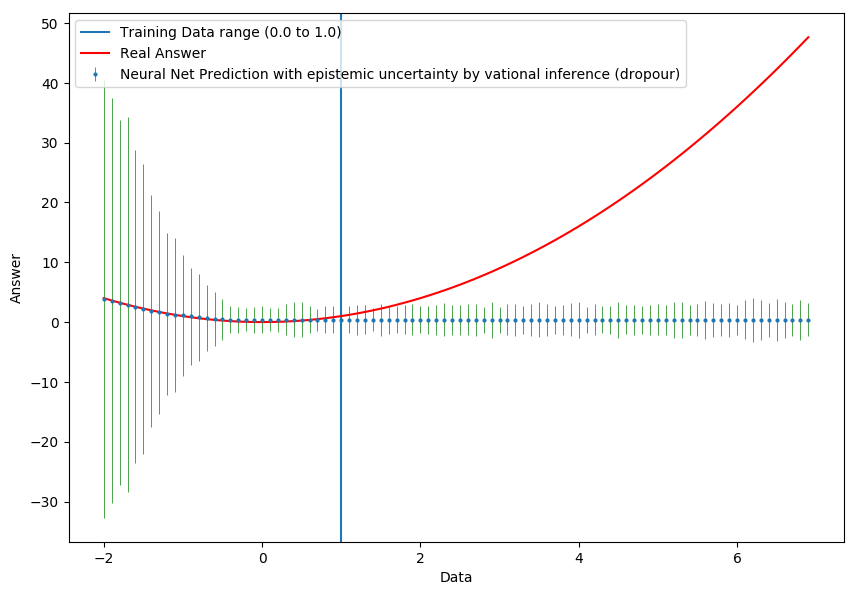

In [236]:
# Generate test data
test_batch_size = 90

#Setup a Keras fucntion to use dropout vational inference in test time
get_dropout_output = function([model.layers[0].input, learning_phase()], [model.layers[-1].output])
mc_dropout_num = 100  # Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 1))
uncertainty = np.zeros((mc_dropout_num, test_batch_size, 1))
for i in range(mc_dropout_num):
    result = get_dropout_output([X.reshape((X.shape[0], 1)), 1])[0]
    predictions[i] = result
    
# get mean results and its varience
prediction_mc_droout = np.mean(predictions, axis=0)
std_mc_droout = np.std(predictions, axis=0)*100
    
# Array for the real equation
x_true = X
y_true = y

# Plotting
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(X, prediction_mc_droout, yerr=std_mc_droout, markersize=2, fmt='o', ecolor='g', capthick=2, elinewidth=0.5, 
             label='Neural Net Prediction with epistemic uncertainty by vational inference (dropour)')
plt.axvline(x=1.0, label="Training Data range (0.0 to 1.0)")
plt.plot(x_true, y_true, color='red', label='Real Answer')
plt.xlabel('Data')
plt.ylabel('Answer')
plt.legend(loc='best')
plt.show()

In [160]:
for i in range(1000):
    print(pipeline.predict(X[0:1,:]))

1/1 [==============================] - 0s 5ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 1ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [==============================] - 0s 2ms/step
0.529478788376
1/1 [=====

In [164]:
def model_dropout():
    
    inputs = Input(shape=(10,))
    x = Dropout(0.5)(inputs)
    
    model = Model(inputs=inputs, outputs=x)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
regression = make_regression()